# Preprocess the Images for CNN

## Step 1: Import Libraries

In [1]:
# Import libraries
import pandas as pd
import os
import cv2
from PIL import Image
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

## Step 2: Read in Data

In [2]:
# Import necessary files
train_file = 'hateful_memes/train.jsonl'
test_file = 'hateful_memes/dev_seen.jsonl'
final_test_file = 'hateful_memes/test_seen.jsonl'

train_data = pd.read_json(train_file, lines = True)
test_data = pd.read_json(test_file, lines = True)
final_test_data = pd.read_json(final_test_file, lines = True)
test_data.head()

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime


In [21]:
len(train_data)

8500

In [9]:
# Get just the image number
train_data['img'] = train_data['img'].str.replace('img/','')
test_data['img'] = test_data['img'].str.replace('img/', '')
final_test_data['img'] = final_test_data['img'].str.replace('img/', '')

# Get a dictionary of testing and training images with labels
training_img = dict(zip(train_data['img'], train_data['label']))
testing_img = dict(zip(test_data['img'], test_data['label']))
final_test_img = dict(zip(final_test_data['img'], final_test_data['label']))

In [25]:
# Get the image files and resize them so they are all the same size
directory = 'hateful_memes/img/'
train_images = []
train_labels = []
test_images = []
test_labels = []
final_test_images = []
final_test_labels = []
count = 0
img_size = 200
for file in os.listdir(directory):
    if file in training_img:
        img = cv2.imread(directory + file)
        img = cv2.resize(img, (img_size, img_size)) # resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # make sure color is correct
        train_images.append(img)
        train_labels.append(training_img[file])
    elif file in testing_img:
        img = cv2.imread(directory + file)
        img = cv2.resize(img, (img_size, img_size)) # resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # make sure color is correct
        test_images.append(img)
        test_labels.append(testing_img[file])
    elif file in final_test_img:
        img = cv2.imread(directory + file)
        img = cv2.resize(img, (img_size, img_size)) # resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # make sure color is correct
        final_test_images.append(img)
        final_test_labels.append(final_test_img[file])
    if count % 1000 == 0:
        print('Images processed: ', count)
        print('Training images: ', len(train_images))
        print('Testing images: ', len(test_images))
        print('Final Test images: ', len(final_test_images))
    count += 1

train_images[0].shape

Images processed:  0
Training images:  0
Testing images:  0
Final Test images:  0
Images processed:  1000
Training images:  702
Testing images:  50
Final Test images:  72
Images processed:  2000
Training images:  1380
Testing images:  97
Final Test images:  160
Images processed:  3000
Training images:  2067
Testing images:  139
Final Test images:  244
Images processed:  4000
Training images:  2754
Testing images:  183
Final Test images:  324
Images processed:  5000
Training images:  3477
Testing images:  220
Final Test images:  387
Images processed:  6000
Training images:  4184
Testing images:  249
Final Test images:  464
Images processed:  7000
Training images:  4886
Testing images:  283
Final Test images:  545
Images processed:  8000
Training images:  5557
Testing images:  332
Final Test images:  636
Images processed:  9000
Training images:  6290
Testing images:  365
Final Test images:  718
Images processed:  10000
Training images:  7004
Testing images:  411
Final Test images:  795
I

(200, 200, 3)

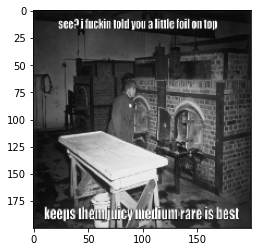

In [28]:
plt.imshow(train_images[1])

In [29]:
train_data[train_data['text'].str.contains("medium rare")]

,id,img,label,text
1211,57348,57348.png,1,see? i fuckin told you a little foil on top ke...
5858,31925,31925.png,1,see? i fuckin told you a little foil on top ke...
8249,17843,17843.png,1,see? i fuckin told you a little foil on top ke...


In [30]:
train_labels[1]

1

## Step 3: Reshape the Data

In [31]:
# Convert the training and testing image arrays to numpy arrays
train_images = np.array(train_images).reshape(-1, img_size, img_size, 3)
test_images = np.array(test_images).reshape(-1, img_size, img_size, 3)
final_test_images = np.array(final_test_images).reshape(-1, img_size, img_size, 3)

In [32]:
# Check the shape of the data
train_images.shape

(8500, 200, 200, 3)

## Step 4: Pickle the Data

In [33]:
# Save the training and test image arrays to pickle files
def save_pickle(filepath, obj):
    with open(filepath, 'wb') as filehandler:
        pickle.dump(obj, filehandler)
    print('{} saved'.format(filepath))


directory = 'hateful_memes/pickles/'    
train_file = directory + 'training_images.p'
train_labels_file = directory + 'training_labels.p'
test_file = directory + 'testing_images.p'
test_labels_file = directory + 'testing_labels.p'
test_final_file = directory + 'testing_final_images.p'
test_final_labels_file = directory + 'testing_final_labels.p'

save_pickle(train_file, train_images)
save_pickle(train_labels_file, train_labels)
save_pickle(test_file, test_images)
save_pickle(test_labels_file, test_labels)
save_pickle(test_final_file, final_test_images)
save_pickle(test_final_labels_file, final_test_labels)

hateful_memes/pickles/training_images.p saved
hateful_memes/pickles/training_labels.p saved
hateful_memes/pickles/testing_images.p saved
hateful_memes/pickles/testing_labels.p saved
hateful_memes/pickles/testing_final_images.p saved
hateful_memes/pickles/testing_final_labels.p saved
